In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

Getting the Data

In [2]:
#get the data for testla stock from Jan 1, 2012 to Jan 1, 2017
tesla = yf.download('TSLA', start='2012-01-01', end='2017-01-01', progress=False)

In [3]:
tesla.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2012-01-03,1.872000,1.966667,1.843333,1.929333,13921500
2012-01-04,1.847333,1.911333,1.833333,1.880667,9451500
2012-01-05,1.808000,1.862000,1.790000,1.850667,15082500
2012-01-06,1.794000,1.852667,1.760667,1.813333,14794500
2012-01-09,1.816667,1.832667,1.741333,1.800000,13455000


In [4]:
#get the data for ford, GM (General Motors) stock from Jan 1, 2012 to Jan 1, 2017
ford = yf.download('F', start='2012-01-01', end='2017-01-01', progress=False)
gm = yf.download('GM', start='2012-01-01', end='2017-01-01', progress=False)

In [5]:
ford.head()

Price,Close,High,Low,Open,Volume
Ticker,F,F,F,F,F
Date,,,,,
2012-01-03,6.148762,6.215056,6.071419,6.076944,45709900
2012-01-04,6.242680,6.369743,6.115616,6.159812,79725200
2012-01-05,6.402890,6.424988,6.209532,6.259253,67877500
2012-01-06,6.469181,6.518902,6.364216,6.485754,59840700
2012-01-09,6.518905,6.601772,6.463660,6.535478,53981500


In [6]:
gm.head()

Price,Close,High,Low,Open,Volume
Ticker,GM,GM,GM,GM,GM
Date,,,,,
2012-01-03,15.859799,15.957747,15.633770,15.694044,9321300
2012-01-04,15.935152,16.100909,15.633778,15.859808,7856700
2012-01-05,16.703653,16.794066,15.791996,15.897478,17880600
2012-01-06,17.268730,17.351608,16.756394,16.771463,18234500
2012-01-09,17.208450,17.652977,17.102970,17.479687,12084500


Visualising the Data

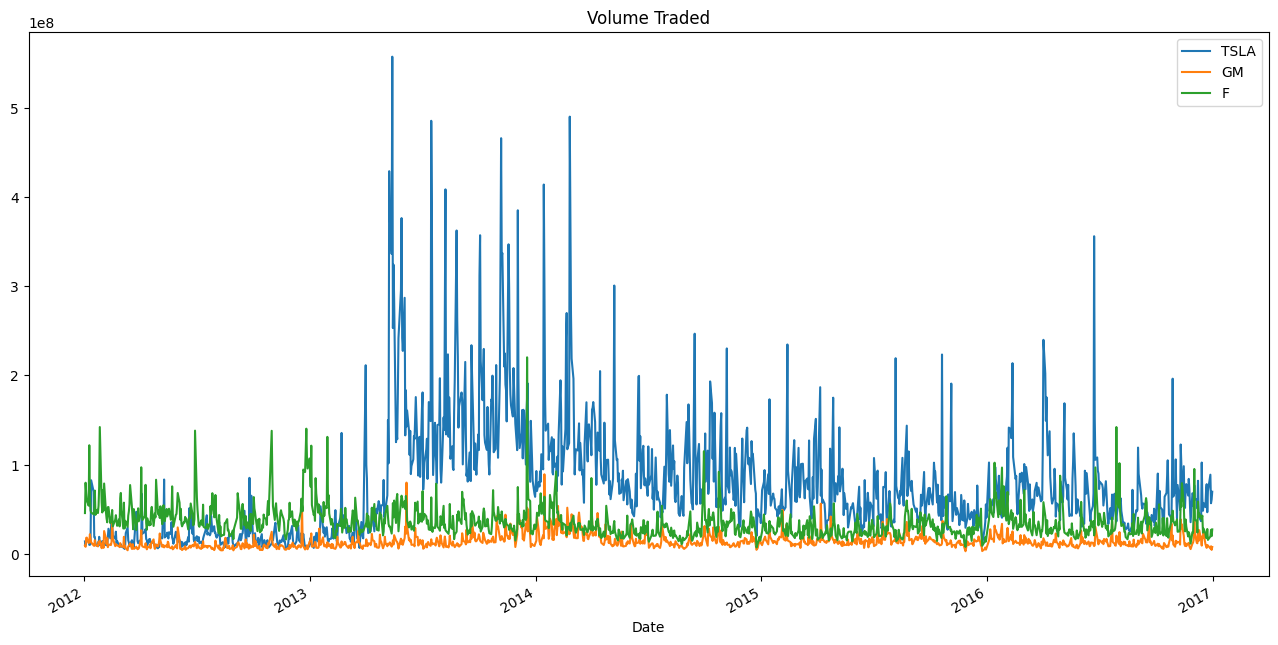

In [17]:
import matplotlib.pyplot as plt

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the volume of stock traded each day for Tesla, GM, and Ford on the same axis
tesla['Volume'].plot(ax=ax, label='Tesla')
gm['Volume'].plot(ax=ax, label='GM')
ford['Volume'].plot(ax=ax, label='Ford')

# Add title and legend
ax.set_title('Volume Traded')
ax.legend()

# Show the plot
plt.show()


Interestingly, Ford had a really big spike in late 2013. What was the date of his maximum trading volume for ford

In [20]:
#I want the date of the highest trading volume for Ford
ford['Volume'].idxmax()

Ticker
F   2013-12-18
dtype: datetime64[ns]

<Axes: title={'center': 'Ford Open Price'}, xlabel='Date'>

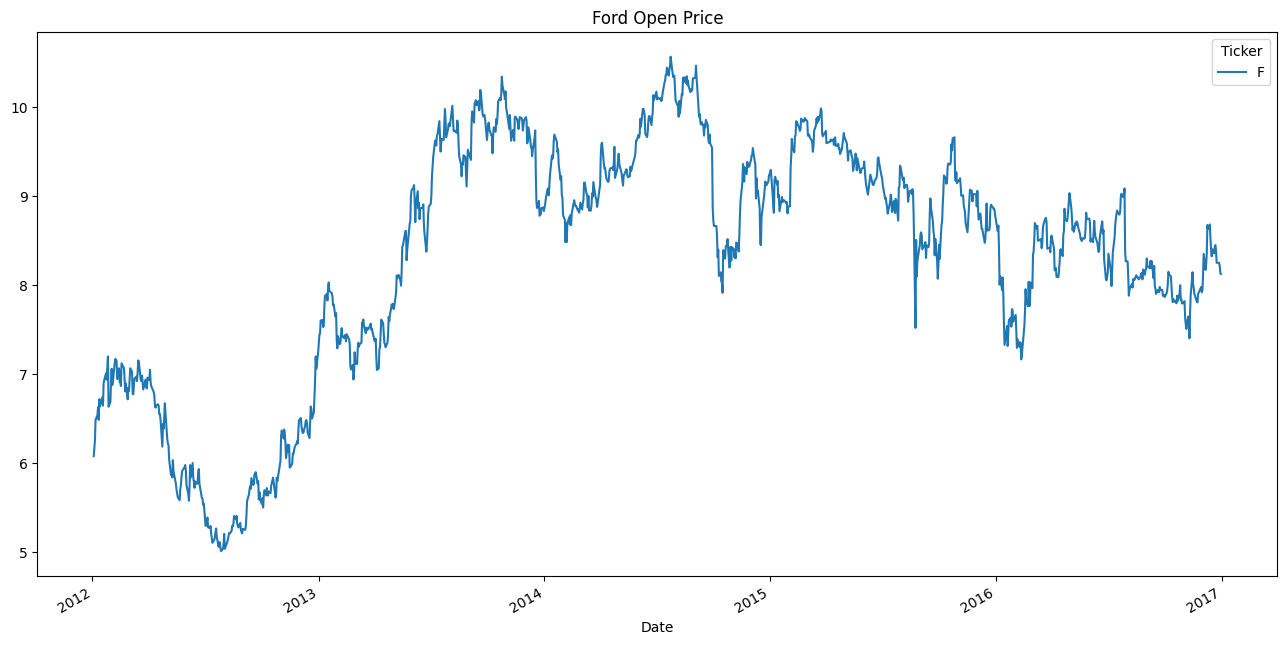

In [22]:
#ford open price plot 
ford['Open'].plot(figsize=(16, 8), title='Ford Open Price')

The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calculation to try to represent total money traded would be to multiply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at $10 each versus 100000 units of stock at $1 each

Create a new column for each dataframe called "Total Traded" which is the open price multiplied by the volume traded

In [23]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

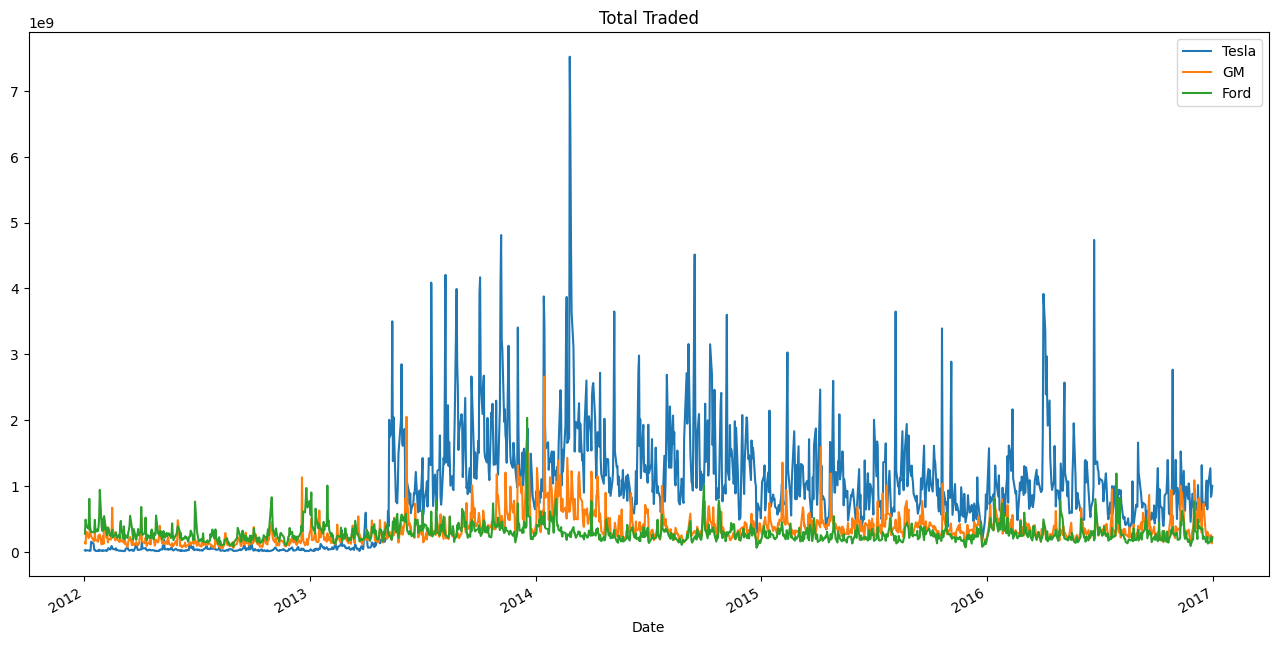

In [24]:
#Plot the total traded for Tesla, GM, and Ford against the time index
tesla['Total Traded'].plot(figsize=(16, 8), label='Tesla')  
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')

#add title and legend
plt.title('Total Traded')
plt.legend()

#show the plot
plt.show()


It looks like there's a large amount of money traded for tesla in 2024. What's that day and what happened?

In [25]:
#what is the tesla total traded max value and the date of that value
#Tesla shares surge on morgan stanley report.
tesla['Total Traded'].max(), tesla['Total Traded'].idxmax()

(7516790844.16151, Timestamp('2014-02-25 00:00:00'))

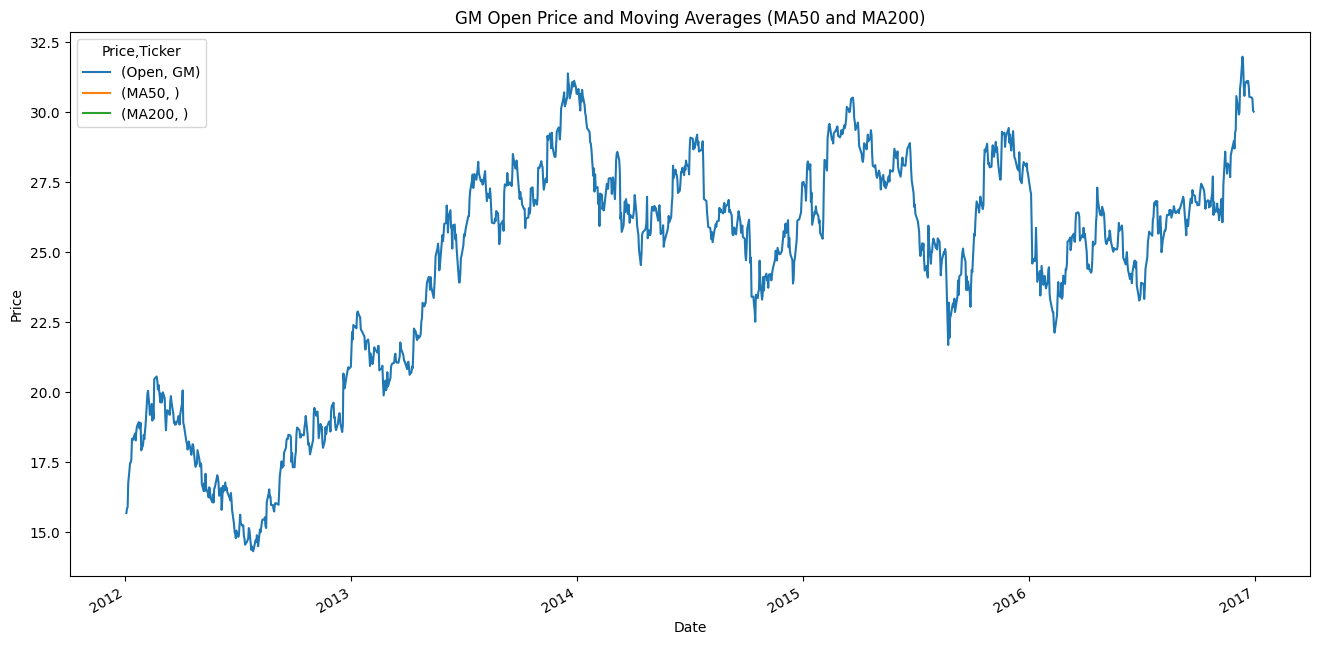

In [28]:
# Plotting the moving average of MA50 and MA200 for GM
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()

# Plotting the 'Open', 'MA50', and 'MA200' on the same graph
ax = gm[['Open', 'MA50', 'MA200']].plot(figsize=(16, 8))

# Set title and labels
ax.set_title('GM Open Price and Moving Averages (MA50 and MA200)')
ax.set_ylabel('Price')

# Show the plot
plt.show()


Finally lets see if there is a relationship between stocks, after all, they are related to the car industry. We can see this early through a scatter matrix plot. import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot all the stock opening price. You may need to rearrange the columns into a new single dataframe. 

In [29]:
from pandas.plotting import scatter_matrix

In [30]:
car_comp = pd.concat([tesla['Open'], gm['Open'], ford['Open']], axis=1)

In [32]:
car_comp.head

<bound method NDFrame.head of Ticker           TSLA         GM         F
Date                                      
2012-01-03   1.929333  15.694044  6.076944
2012-01-04   1.880667  15.859808  6.159812
2012-01-05   1.850667  15.897478  6.259253
2012-01-06   1.813333  16.771463  6.485754
2012-01-09   1.800000  17.479687  6.535478
...               ...        ...       ...
2016-12-23  13.866667  30.551139  8.252141
2016-12-27  14.325333  30.525566  8.252141
2016-12-28  14.768667  30.474400  8.212307
2016-12-29  14.570667  30.056589  8.132641
2016-12-30  14.420000  30.022482  8.126001

[1258 rows x 3 columns]>

In [34]:
car_comp.columns = ['Tesla Open', 'GM Open', 'Ford Open']

In [35]:
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,1.929333,15.694044,6.076944
2012-01-04,1.880667,15.859808,6.159812
2012-01-05,1.850667,15.897478,6.259253
2012-01-06,1.813333,16.771463,6.485754
2012-01-09,1.800000,17.479687,6.535478


array([[<Axes: xlabel='Tesla Open', ylabel='Tesla Open'>,
        <Axes: xlabel='GM Open', ylabel='Tesla Open'>,
        <Axes: xlabel='Ford Open', ylabel='Tesla Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='GM Open'>,
        <Axes: xlabel='GM Open', ylabel='GM Open'>,
        <Axes: xlabel='Ford Open', ylabel='GM Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='Ford Open'>,
        <Axes: xlabel='GM Open', ylabel='Ford Open'>,
        <Axes: xlabel='Ford Open', ylabel='Ford Open'>]], dtype=object)

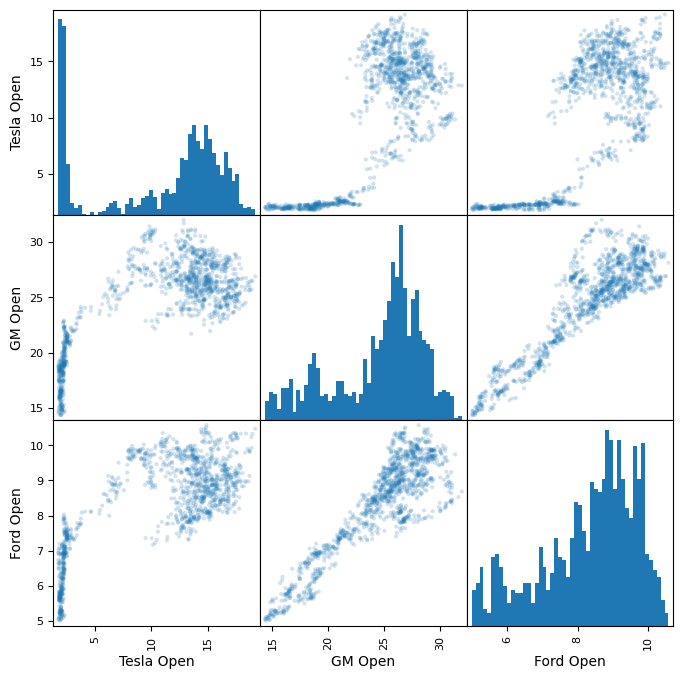

In [36]:
scatter_matrix(car_comp, figsize=(8, 8), alpha=0.2, hist_kwds={'bins': 50})

In [37]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

c:\Users\allif\AppData\Local\Programs\Python\Python39\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [38]:
ford.head()

Price,Close,High,Low,Open,Volume,Total Traded
Ticker,F,F,F,F,F,
Date,,,,,,
2012-01-03,6.148762,6.215056,6.071419,6.076944,45709900,2.777765e+08
2012-01-04,6.242680,6.369743,6.115616,6.159812,79725200,4.910922e+08
2012-01-05,6.402890,6.424988,6.209532,6.259253,67877500,4.248624e+08
2012-01-06,6.469181,6.518902,6.364216,6.485754,59840700,3.881121e+08
2012-01-09,6.518905,6.601772,6.463660,6.535478,53981500,3.527949e+08


In [39]:
ford_reset = ford.loc['2012-01':'2012-01']

In [40]:
ford_reset

Price,Close,High,Low,Open,Volume,Total Traded
Ticker,F,F,F,F,F,
Date,,,,,,
2012-01-03,6.148762,6.215056,6.071419,6.076944,45709900,2.777765e+08
2012-01-04,6.242680,6.369743,6.115616,6.159812,79725200,4.910922e+08
2012-01-05,6.402890,6.424988,6.209532,6.259253,67877500,4.248624e+08
2012-01-06,6.469181,6.518902,6.364216,6.485754,59840700,3.881121e+08
2012-01-09,6.518905,6.601772,6.463660,6.535478,53981500,3.527949e+08
2012-01-10,6.518905,6.657017,6.424988,6.629394,121750600,8.071328e+08
2012-01-11,6.668064,6.728834,6.436035,6.485756,63806000,4.138301e+08
2012-01-12,6.706737,6.728835,6.568625,6.717786,48687700,3.270735e+08


In [41]:
ford_reset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2012-01-03 to 2012-01-31
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, F)        20 non-null     float64
 1   (High, F)         20 non-null     float64
 2   (Low, F)          20 non-null     float64
 3   (Open, F)         20 non-null     float64
 4   (Volume, F)       20 non-null     int64  
 5   (Total Traded, )  20 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.1 KB


In [43]:
ford_reset = ford_reset.reset_index()
ford_reset['Date'] = ford_reset['Date'].apply(lambda date: date2num(date))

In [44]:
ford_reset.head()

Price,Date,Close,High,Low,Open,Volume,Total Traded
Ticker,,F,F,F,F,F,
0,15342.0,6.148762,6.215056,6.071419,6.076944,45709900,2.777765e+08
1,15343.0,6.242680,6.369743,6.115616,6.159812,79725200,4.910922e+08
2,15344.0,6.402890,6.424988,6.209532,6.259253,67877500,4.248624e+08
3,15345.0,6.469181,6.518902,6.364216,6.485754,59840700,3.881121e+08
4,15348.0,6.518905,6.601772,6.463660,6.535478,53981500,3.527949e+08


In [45]:
list_of_cols = ['Date', 'Open', 'High', 'Low', 'Close']
ford_values = [tuple(vals) for vals in ford_reset[['Date', 'Open', 'High', 'Low', 'Close']].values]



In [46]:
ford_values

[(15342.0,
  6.0769437369003665,
  6.215056094557193,
  6.071419116148453,
  6.148762226104736),
 (15343.0,
  6.159811852967068,
  6.369742730917228,
  6.115615934120393,
  6.242679595947266),
 (15344.0,
  6.259252733463321,
  6.424987687262199,
  6.209532194637969,
  6.402889728546143),
 (15345.0,
  6.485754391596634,
  6.5189015800645596,
  6.364215929879847,
  6.469181060791016),
 (15348.0,
  6.535478024676049,
  6.601771906340702,
  6.463659521158441,
  6.518904685974121),
 (15349.0,
  6.629394488748542,
  6.657017071156382,
  6.424988221901628,
  6.518904685974121),
 (15350.0,
  6.485755856813944,
  6.72883388887541,
  6.436035326307881,
  6.668064117431641),
 (15351.0,
  6.717785757378983,
  6.728835000141469,
  6.568624668083667,
  6.706737041473389),
 (15352.0,
  6.634916402711757,
  6.673587686185768,
  6.54099997696911,
  6.651489734649658),
 (15356.0,
  6.739881942099095,
  6.773029134805266,
  6.60729422498792,
  6.640441417694092),
 (15357.0,
  6.645965451191274,
  6.83379

In [54]:
from matplotlib.dates import WeekdayLocator, DayLocator, DateFormatter

In [55]:
# Define the locators and formatters
mondays = WeekdayLocator(0)  # Monday (0 for Monday)
alldays = DayLocator()  # Minor ticks for every day
weekFormatter = DateFormatter('%b %d')  # Major formatter for weeks (e.g., Jan 12)
dayFormatter = DateFormatter('%d')  # Minor formatter for days (e.g., 12)


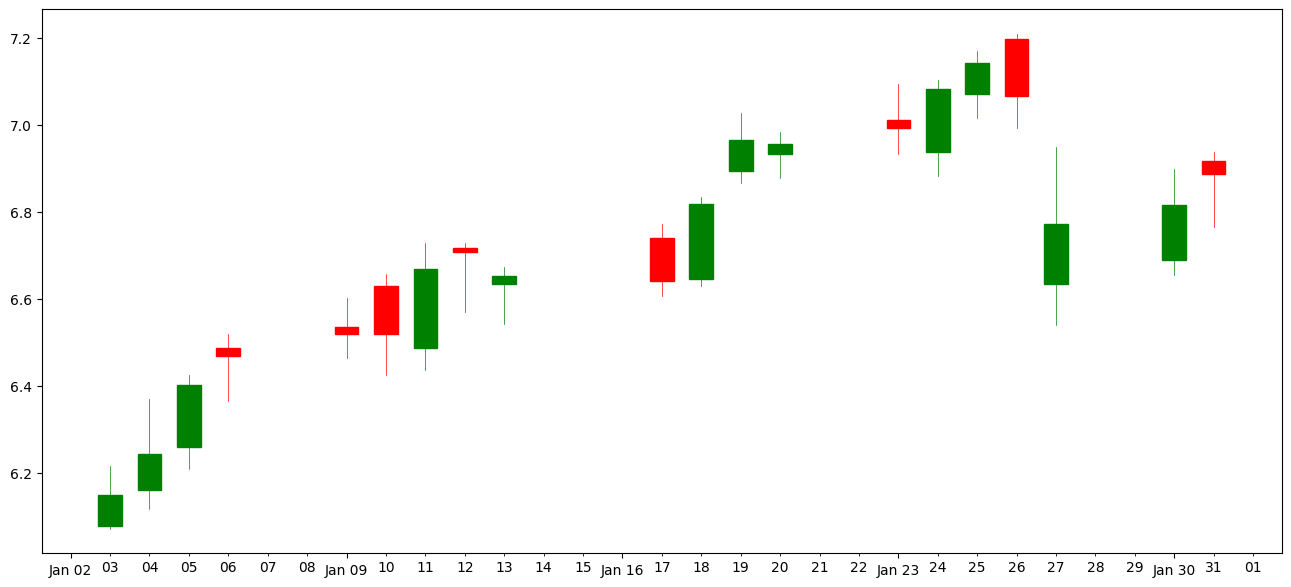

In [56]:
fig, ax = plt.subplots(figsize=(16, 8))
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
ax.xaxis.set_minor_formatter(dayFormatter)
ax.xaxis.set_major_locator(mondays)

candlestick_ohlc(ax, ford_values, width=0.6, colorup='g', colordown='r');

First, we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

This defines
𝑟
𝑡
r 
t
​
  (return at time 
𝑡
t) as equal to the price at time 
𝑡
t divided by the price at time 
𝑡
−
1
t−1 (the previous day) minus 1. Basically, this informs you of your percent gain (or loss) if you bought the stock on day 
𝑡
−
1
t−1 and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, it's very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!



Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or  also use pandas' built-in pct_change() method.

In [82]:
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) )-1

In [85]:
tesla['returns'] = tesla['Close'].pct_change(1)



In [86]:
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)


In [87]:
ford.head()

Price,Close,High,Low,Open,Volume,Total Traded,returns
Ticker,F,F,F,F,F,,
Date,,,,,,,
2012-01-03,6.148762,6.215056,6.071419,6.076944,45709900,2.777765e+08,NaN
2012-01-04,6.242680,6.369743,6.115616,6.159812,79725200,4.910922e+08,0.015274
2012-01-05,6.402890,6.424988,6.209532,6.259253,67877500,4.248624e+08,0.025664
2012-01-06,6.469181,6.518902,6.364216,6.485754,59840700,3.881121e+08,0.010353
2012-01-09,6.518905,6.601772,6.463660,6.535478,53981500,3.527949e+08,0.007686


which of the stock market is volatile

<Axes: >

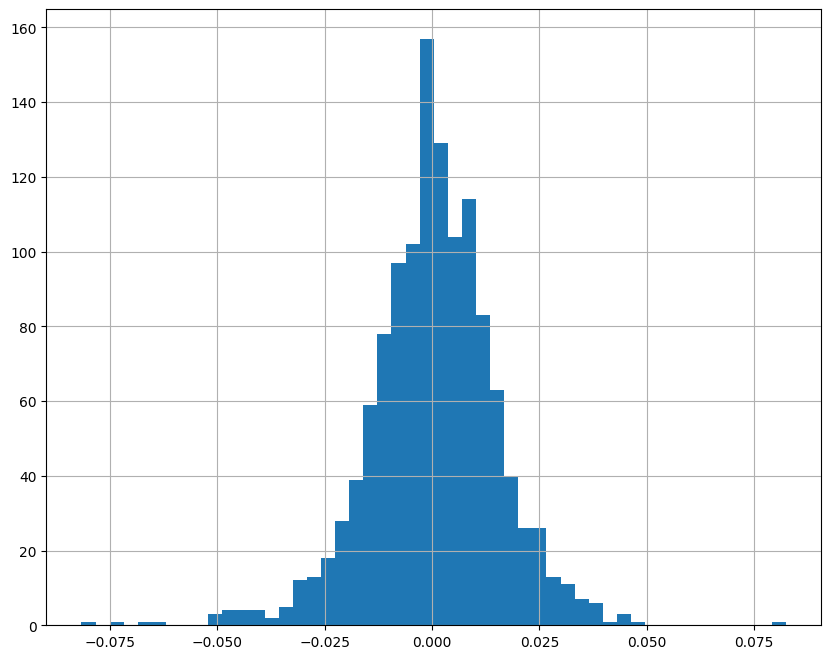

In [89]:
ford['returns'].hist(bins=50, figsize=(10,8))

In [90]:
len(ford['returns'])

1258

<Axes: >

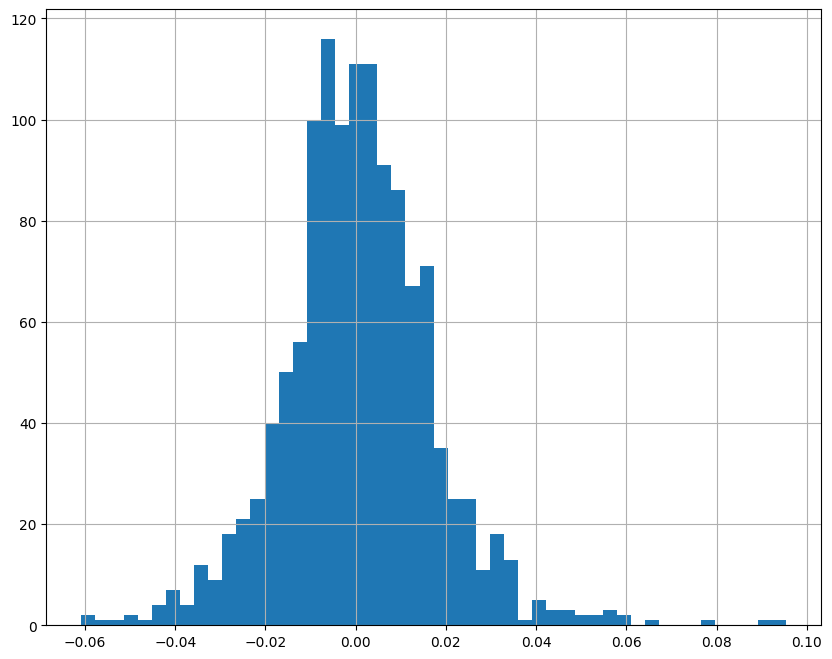

In [91]:
gm['returns'].hist(bins=50, figsize=(10,8))

<Axes: >

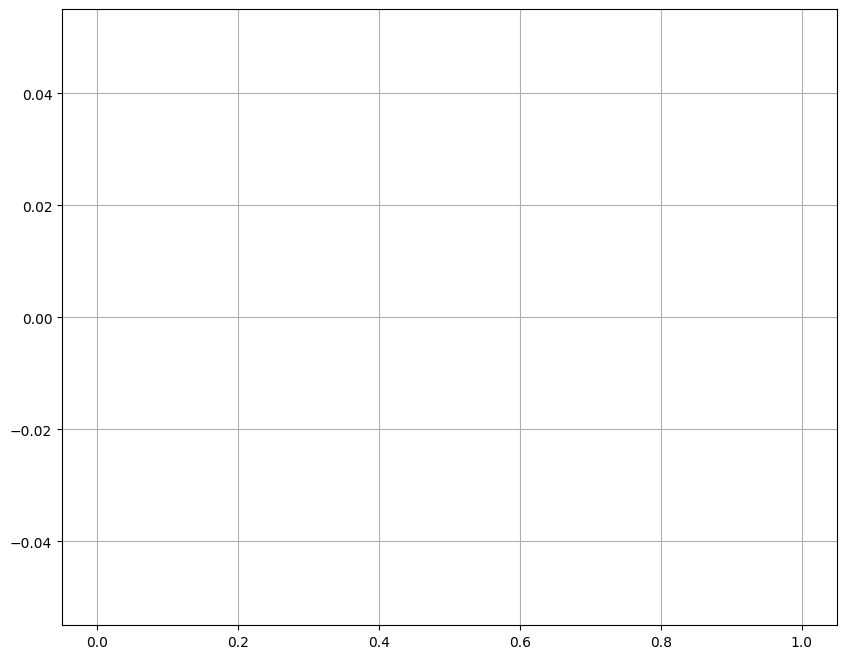

In [92]:
tesla['returns'].hist(bins=50, figsize=(10,8))

<Axes: >

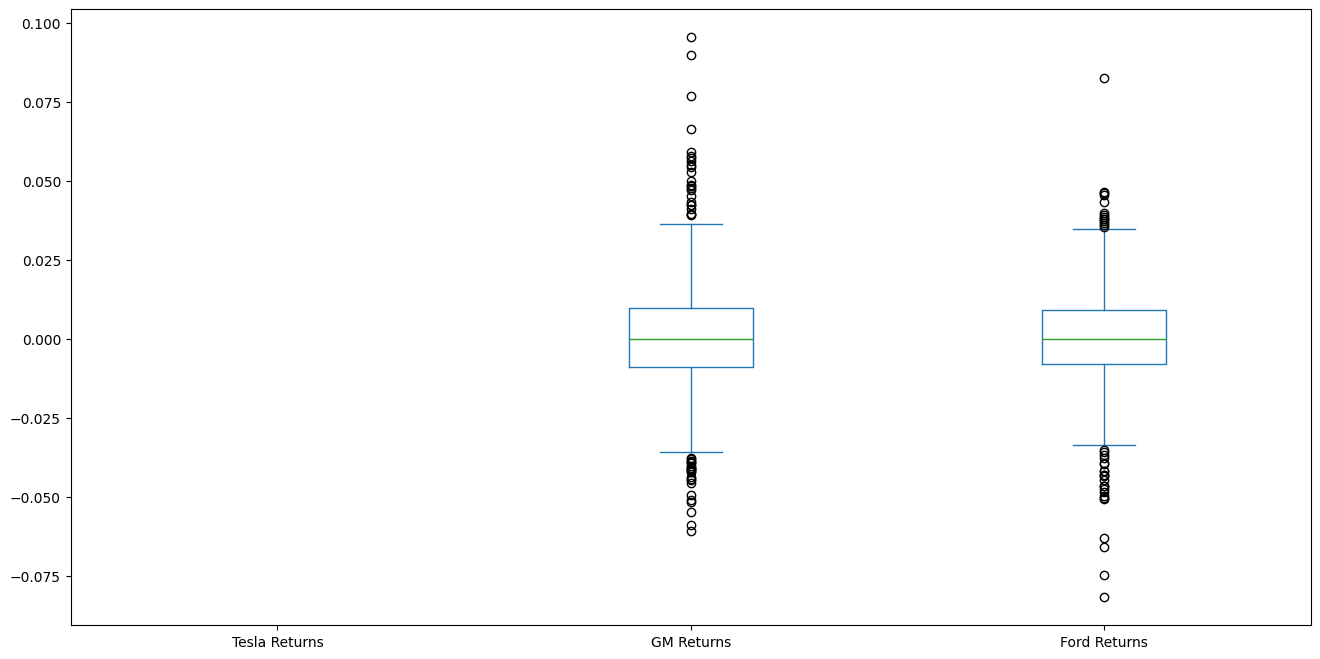

In [93]:
#box plot of returns for tesla, gm, ford
box_df = pd.concat([tesla['returns'], gm['returns'], ford['returns']], axis=1)
box_df.columns = ['Tesla Returns', 'GM Returns', 'Ford Returns']
box_df.plot(kind='box', figsize=(16, 8))


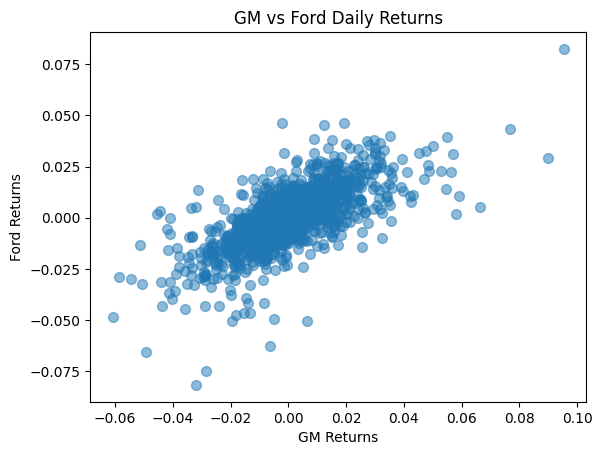

In [94]:
#compare the daily returns between the stocks gm and ford
plt.scatter(gm['returns'], ford['returns'], alpha=0.5, s=50)
plt.title('GM vs Ford Daily Returns')
plt.xlabel('GM Returns')
plt.ylabel('Ford Returns')
plt.show()


Create a cummulative daily return column for each car comapny's 

In [95]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

In [96]:
ford

Price,Close,High,Low,Open,Volume,Total Traded,returns,Cumulative Return
Ticker,F,F,F,F,F,,,
Date,,,,,,,,
2012-01-03,6.148762,6.215056,6.071419,6.076944,45709900,2.777765e+08,NaN,NaN
2012-01-04,6.242680,6.369743,6.115616,6.159812,79725200,4.910922e+08,0.015274,1.015274
2012-01-05,6.402890,6.424988,6.209532,6.259253,67877500,4.248624e+08,0.025664,1.041330
2012-01-06,6.469181,6.518902,6.364216,6.485754,59840700,3.881121e+08,0.010353,1.052111
2012-01-09,6.518905,6.601772,6.463660,6.535478,53981500,3.527949e+08,0.007686,1.060198
...,...,...,...,...,...,...,...,...
2016-12-23,8.272058,8.272058,8.205668,8.252141,15621200,1.289083e+08,0.004839,1.345321
2016-12-27,8.225585,8.305252,8.205668,8.252141,19467400,1.606477e+08,-0.005618,1.337763


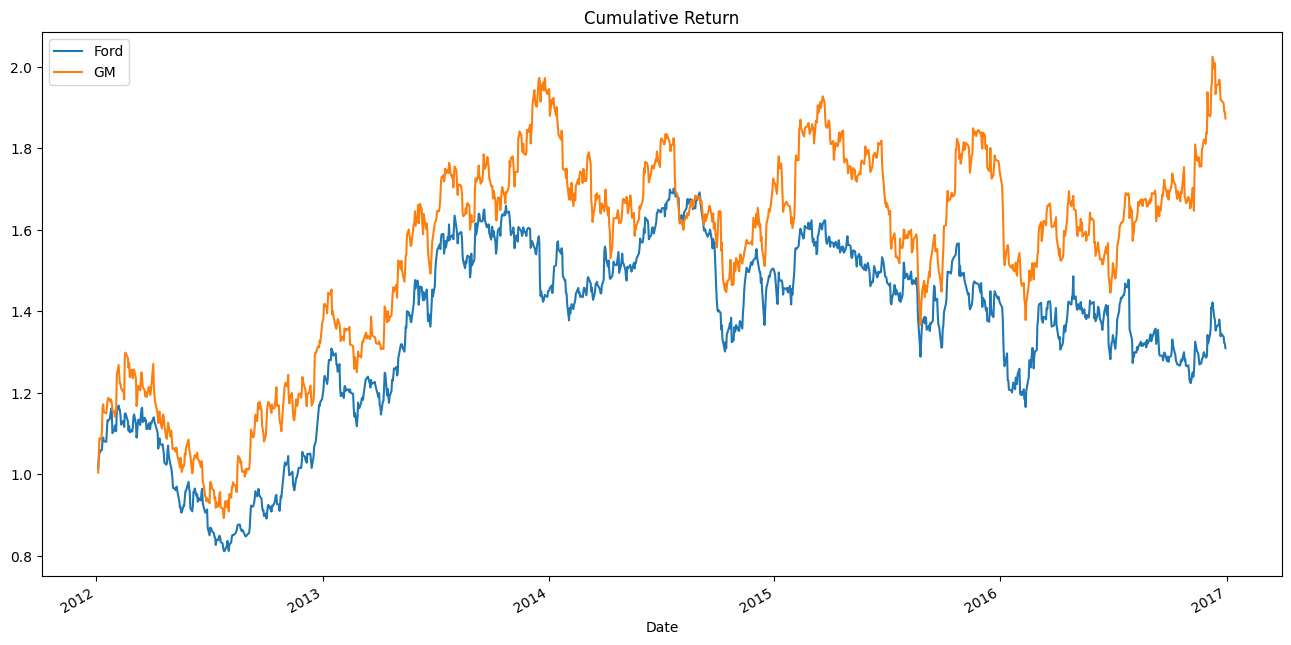

In [98]:
# Ensure the 'Cumulative Return' column is created
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

# Plot the cumulative return of GM and Ford
ford['Cumulative Return'].plot(label='Ford', figsize=(16, 8))
gm['Cumulative Return'].plot(label='GM')
plt.title('Cumulative Return')
plt.legend()
plt.show()